#### Imports

In [351]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import json

## Global Constants

In [1]:
DATA_FILENAME = "data.json"

## Helper Functions

In [355]:
def extract_relevant_data(full_zillow_data):
    """
    Argument: `full_zillow_data` is a JSON dictionary from the Zillow data of a sold house.
    """
    house_details = full_zillow_data["data"]["property"]
    relevant_data = {}
    relevant_data["id"] = int(house_details["zpid"])
    relevant_data["price"] = float(house_details["lastSoldPrice"])
    relevant_data["address"] = house_details["abbreviatedAddress"]
    relevant_data["location"] = house_details["formattedChip"]["location"][1]["fullValue"]
    relevant_data["beds"] = float(house_details["bedrooms"])
    relevant_data["baths"] = float(house_details["bathrooms"])
    relevant_data["acres"] = float(house_details["lotAreaValue"])
    if house_details["lotAreaUnits"] == "Square Feet":
        # Convert sqft to acres if needed
        relevant_data["acres"] /= 43560.  
    relevant_data["sqft"] = int(house_details["livingAreaValue"])
    relevant_data["year"] = int(house_details["yearBuilt"])
    relevant_data["lat"] = float(house_details['latitude'])
    relevant_data["lon"] = float(house_details['longitude'])
    relevant_data["realtor"] = house_details["brokerageName"]
    relevant_data["date_sold"] = int(house_details["dateSold"] / 1000)
    
    return relevant_data

def add_entry(json_string, ids):
    """
    Argument: `json_string` should be a non-pretty-printed raw JSON string copied from the
              Network > Response section of the web-browser's inspection window. It could be
              named 'async-create-page-state' or '?extensions=%7B...'.
    """
    full_house_data = json.loads(json_string, strict=False)  # crashes when strict=True (default)
    relevant_data = extract_relevant_data(full_house_data)

    # If the id is a duplicate, don't write it to the file
    if relevant_data["id"] in ids:
        print("id %d is a duplicate" % (relevant_data["id"]))
        return
    f = open(DATA_FILENAME, 'a')
    f.write(json.dumps(relevant_data) + "\n")
    f.close()

def load_present_ids():
    ids = set()
    f = open(DATA_FILENAME, 'r')
    for line in f:
        house_data = json.loads(line)
        ids.add(house_data["id"])
    f.close()
    return ids

# Add a New Entry Here

In [339]:
ids = load_present_ids()
# Replace the contents of raw_json.txt
f = open("raw_json.txt", 'r', encoding="utf8")
raw_json = f.read()
f.close()

# Uncomment this code to the relevant json
#js = json.loads(raw_json)["data"]["property"]
#for key in js:
#    if not "Photo" in key and not "View" in key and not "Map" in key and not "Json" in key and not "nearby" in key and not "Valuation" in key:
#        print(key, js[key])

add_entry(raw_json, ids)

## Inspect the Data

In [340]:
f = open(DATA_FILENAME, 'r')
all_data = {}
for line in f:
    house_data = json.loads(line)
    for key in house_data:
        if key != "date_sold":
            value = house_data[key]
        else:
            value = datetime.datetime.fromtimestamp(house_data[key])
        try:
            all_data[key].append(house_data[key])
        except KeyError:
            all_data[key] = [house_data[key]]
df = pd.DataFrame.from_dict(all_data)
print("You have data for %d houses" % (len(df)))
print("First 10")
display(df.head(10))
print("Most recent 10")
display(df.tail(10))

You have data for 188 houses
First 10


,id,price,address,location,beds,baths,sqft,year,lat,lon,realtor,acres,date_sold
0,31765002,280000.0,4202 Henneberry Rd,"Manlius, NY 13104",3.0,2.0,1616,1977,42.975567,-76.002500,Howard Hanna Real Estate,1.2400,1694131200
1,31728477,201000.0,4515 Apulia Rd,"Jamesville, NY 13078",4.0,3.0,2100,1971,42.990322,-76.072260,Bell Home Team,0.5700,1692835200
2,61998985,400000.0,8195 Trellis Brook Ln,"Liverpool, NY 13090",4.0,3.0,2552,2003,43.169643,-76.210380,NextHome CNY Realty,0.2290,1662595200
3,60045157,330900.0,3629 Redhead Ter,"Liverpool, NY 13090",3.0,4.0,1704,2001,43.179996,-76.248474,"Your Home CNY Realty, LLC",0.2092,1656028800
4,31709619,225000.0,4211 Mill Run Rd,"Liverpool, NY 13090",3.0,2.0,1568,1976,43.160206,-76.222730,Hunt Real Estate ERA,0.1800,1696377600
5,31709342,302000.0,8183 Capricorn Dr,"Liverpool, NY 13090",3.0,3.0,1540,1987,43.166700,-76.237040,Syracuse Realty Group,0.2095,1695945600
6,31709639,255000.0,8068 Turtle Cove Rd,"Liverpool, NY 13090",4.0,2.0,1828,1977,43.160100,-76.224560,Century 21 Leah's Signature,0.2545,1695859200
7,31708059,263000.0,4080 Sweet Gum Ln,"Liverpool, NY 13090",3.0,2.0,1506,1984,43.181450,-76.231735,Howard Hanna Real Estate,0.1829,1695772800
8,31710390,360000.0,8211 Penelope Ln,"Liverpool, NY 13090",4.0,3.0,2392,1992,43.166930,-76.215225,"Coldwell Banker Prime Prop,Inc",0.2905,1695081600
9,31712938,210000.0,8009 Princess Path,"Liverpool, NY 13090",3.0,3.0,1682,1968,43.158070,-76.221664,"Coldwell Banker Prime Prop,Inc",0.2009,1695081600


Most recent 10


,id,price,address,location,beds,baths,sqft,year,lat,lon,realtor,acres,date_sold
178,31727962,323000.0,717 Maple Dr,"Fayetteville, NY 13066",4.0,2.0,1736,1965,43.015377,-76.053650,Hunt Real Estate ERA,0.5000,1684972800
179,31727976,225000.0,6824 Woodchuck Hill Rd,"Fayetteville, NY 13066",3.0,2.0,2068,1955,43.012463,-76.049930,Howard Hanna Real Estate,1.2700,1667865600
180,31727977,338800.0,6800 Woodchuck Hill Rd,"Fayetteville, NY 13066",2.0,2.0,1738,1958,43.012745,-76.051410,GRG Gloria Realty Group,1.6300,1661385600
181,31728005,321000.0,6811 Woodchuck Hill Rd,"Fayetteville, NY 13066",4.0,3.0,2469,1983,43.013300,-76.050030,CNYHomes,0.5700,1630627200
182,55507085,470000.0,5120 Greenbank Dr,"Jamesville, NY 13078",4.0,4.0,2500,1999,43.018974,-76.073490,Hunt Real Estate ERA,0.6300,1660521600
183,55507133,280000.0,105 Cedar Heights Dr,"Jamesville, NY 13078",4.0,3.0,2800,1972,43.014336,-76.059330,Berkshire Hathaway CNY Realty,0.4900,1633046400
184,60045342,415000.0,6465 River Birchfield Rd,"Jamesville, NY 13078",3.0,2.0,1905,2002,43.014385,-76.076904,Berkshire Hathaway CNY Realty,0.6200,1662681600
185,60045370,399900.0,5030 Yellow Wood Pkwy,"Jamesville, NY 13078",3.0,3.0,2719,2004,43.015170,-76.078804,Howard Hanna Real Estate,0.5100,1636934400
186,66500375,444000.0,6429 Cricklewood Green Ln,"Jamesville, NY 13078",3.0,4.0,2801,2004,43.015520,-76.080160,Howard Hanna Real Estate,0.4700,1665964800
187,84106034,395000.0,6765 Flametree Dr,"Fayetteville, NY 13066",2.0,2.0,1688,2009,43.018593,-76.061220,Hunt Real Estate ERA,0.5015,1619654400


# Analyze the Data

### Basic plot of price per square foot vs date sold

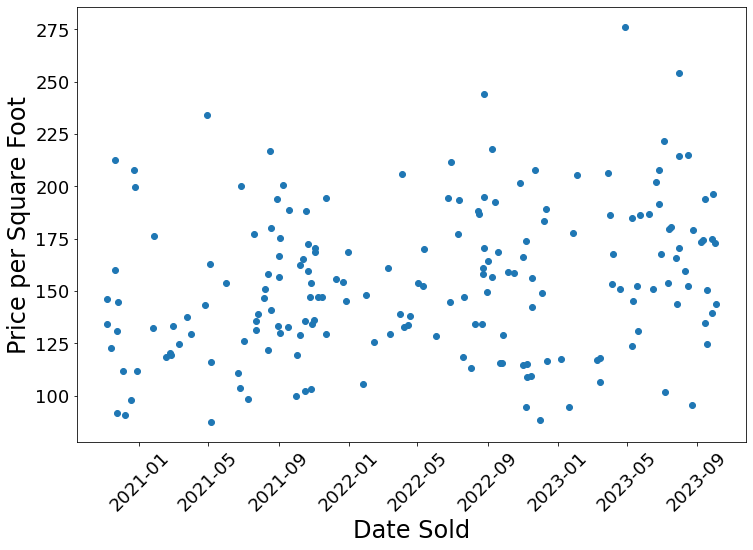

In [367]:
prices = df.loc[:,"price"]
sqfts = df.loc[:,"sqft"]
dates = [datetime.datetime.fromtimestamp(x) for x in df.loc[:,"date_sold"]]
price_per_sqfts = prices / sqfts

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(dates, price_per_sqfts, 'o')
ax.format_xdata = mdates.DateFormatter('%D:%M:%Y')
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlabel("Date Sold", fontsize=24)
ax.set_ylabel("Price per Square Foot", fontsize=24)
plt.show()